In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp

In [12]:
df = pd.read_csv('../data/processed/cleaned_data.csv')
df.head(5)

,Label,Brand,Name,Price,Rank,Ingredients
0,3.0,64.0,Crème de la Mer,175.0,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat..."
1,3.0,95.0,Facial Treatment Essence,179.0,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle..."
2,3.0,29.0,Protini™ Polypeptide Cream,68.0,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary..."
3,3.0,64.0,The Moisturizing Soft Cream,175.0,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P..."
4,3.0,49.0,Your Skin But Better™ CC+™ Cream with SPF 50+,38.0,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet..."


# Check the variedness of the dataset
## -> Calculate the Z score 

### Rank & Price
1. Calculate the Z score using pandas

### Brand
1. Turn the brands column into a list
2. Assign an ID to the unique brands in the brand column
3. Change the dataframe to show the IDs instead of the Brand names
4. Calculate the Z score of the Brands list using pandas

Z-Score Maxes & Mins



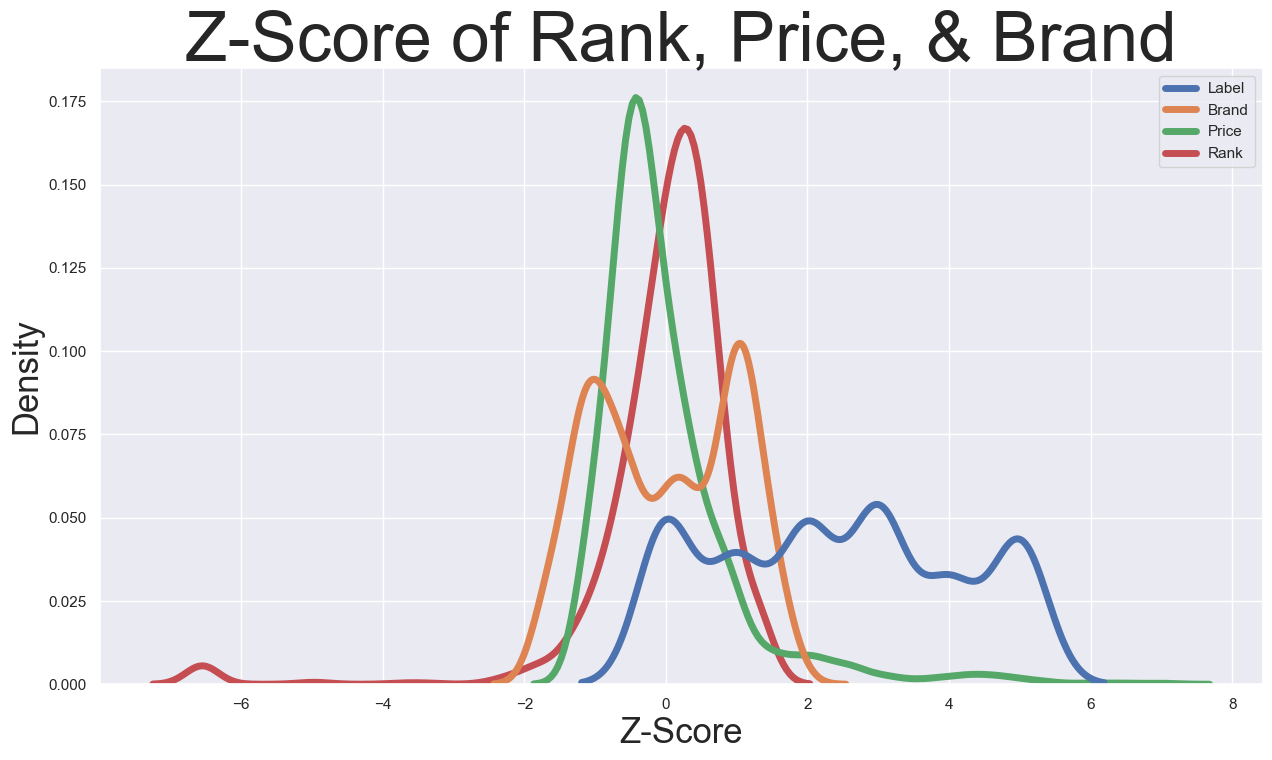

In [13]:
counts1 = df['Price'] =(df['Price'] - df['Price'].mean()) / df["Price"].std()

counts2 = df['Rank'] =(df['Rank'] - df['Rank'].mean()) / df["Rank"].std()

counts3 = df['Brand'] =(df['Brand'] - df['Brand'].mean()) / df["Brand"].std()

df['Price']
df['Rank']

ax = sns.kdeplot(
    data=df,
    linewidth = 5)

ax.set_title("Z-Score of Rank, Price, & Brand", size= 50)

ax.set_xlabel("Z-Score", size = 25)
#ax.set_xticklabels(ax.get_yticklabels(), size = 20)

ax.set_ylabel("Density", size = 25)
#ax.set_yticklabels(ax.get_yticklabels(), size=20)

price_min_z_score = df.min(axis=0)['Price']
price_max_z_score = df.max(axis=0)['Price']

rank_min_z_score = df.min(axis=0)['Rank']
rank_max_z_score = df.max(axis=0)['Rank']

brand_min_z_score = df.min(axis=0)['Brand']
brand_max_z_score = df.max(axis=0)['Brand']


print('Z-Score Maxes & Mins' + '\n')

# print("Price (Min): " + price_min_z_score)
# print("Price (Max): " + price_max_z_score)
# print("Rank (Min): " + rank_min_z_score)
# print("Rank (Max): " + rank_max_z_score)
# print("Brand (Min): " + brand_min_z_score)
# print("Brand (Max): " + brand_max_z_score)

In [14]:
from collections import defaultdict

brand_list = df['Brand'].tolist()

print("The original list : " + str(brand_list))

# using list comprehension + defaultdict + lambda
# assigning ids to values
temp = defaultdict(lambda: len(temp))
res = [temp[ele] for ele in brand_list]

# print result
#print("The ids of assigned values is : " + str(res))

# print(res)
# print(temp) # prints the ids for each brand

df['Brand']= pd.DataFrame(res)


The original list : [0.25760445606494037, 1.2220782449683993, -0.8313175636647713, 0.25760445606494037, -0.20907640953350745, 1.5643108797405942, -0.8313175636647713, -0.8313175636647713, 0.039820052118998056, 0.25760445606494037, -0.48908492889257615, 0.039820052118998056, -1.5157828332091614, 1.4398626489143416, -0.6446452174253922, -0.8313175636647713, -0.5513090443057025, -1.1424381407304032, -0.48908492889257615, 1.2220782449683993, 0.25760445606494037, -1.609119006328851, 1.190966187261836, -0.48908492889257615, -1.5157828332091614, -1.2357743138500927, -0.8313175636647713, 0.8798456101962041, -1.1424381407304032, 1.2220782449683993, -0.48908492889257615, 1.5643108797405942, 0.8176214947830778, -0.11574023641381789, -0.20907640953350745, -0.6135331597188289, 0.3509406291846299, 0.3509406291846299, 1.2220782449683993, -0.8624296213713344, 1.5643108797405942, 1.190966187261836, -1.1424381407304032, 0.8176214947830778, 1.4398626489143416, -0.42686081347944976, -0.3335246403597602, 1

## Styling the graphs 
* used fonts:
* imported fonts from HTML5 library
* colorized graphs based on this palette: 


In [15]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

## Now we must search the ingredents column for common toxin names

### finding the variables occurances of each toxin in the ingredents column

131
499
1028
0
80
17
0
0
0
7
76
0


<AxesSubplot:>

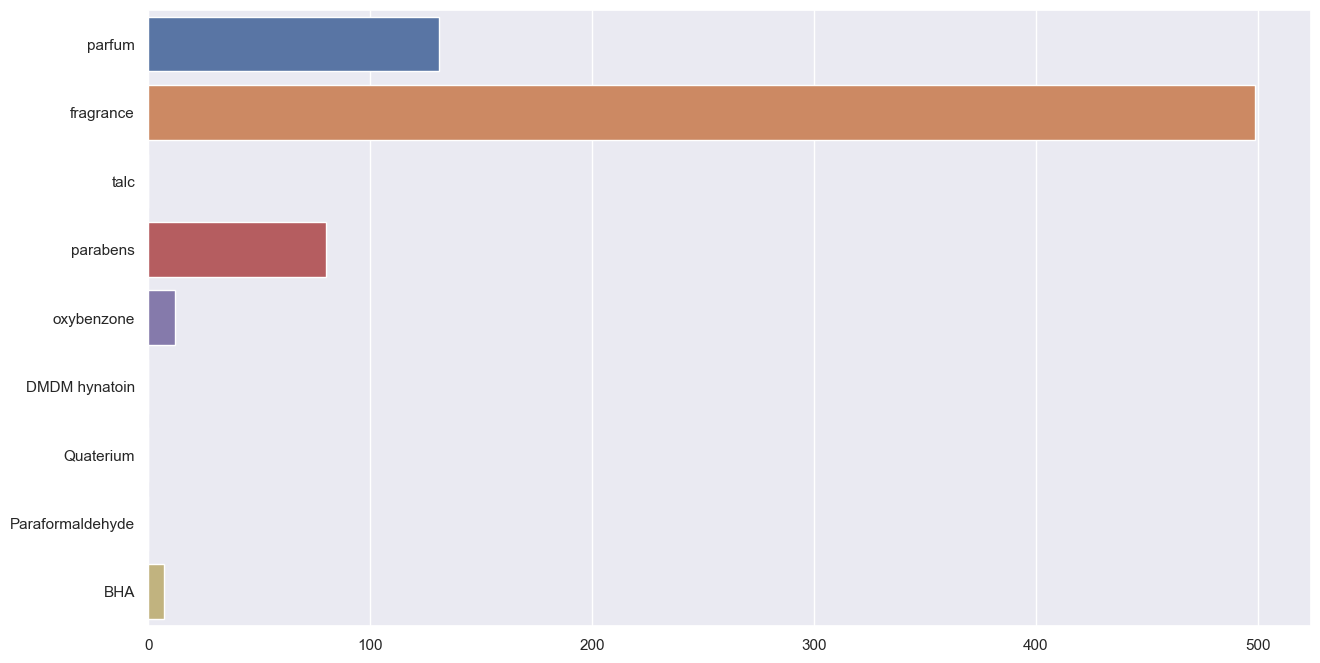

In [16]:
parfum_occ = df[df['Ingredients'].str.contains("Parfum")].shape[0]
fragrance_occ = df[df['Ingredients'].str.contains("Fragrance")].shape[0]
glycol_occ = df[df['Ingredients'].str.contains("Glycol")].shape[0]


homosalate_occ = df[df['Ingredients'].str.contains("Homosalate")].shape[0]
oxybenzone_occ = df[df['Ingredients'].str.contains("Oxybenzone")].shape[0]
DMDM_hyantoin_occ = df[df['Ingredients'].str.contains("DMDM hyantoin")].shape[0]
quaterium_occ = df[df['Ingredients'].str.contains("quaterium")].shape[0]
paraformaldehyde_occ = df[df['Ingredients'].str.contains("quaterium")].shape[0]
bha_occ = df[df['Ingredients'].str.contains("BHA")].shape[0]
bht_occ = df[df['Ingredients'].str.contains('BHT')].shape[0]
diethanolamine_occ = df[df['Ingredients'].str.contains('diethanolamine')].shape[0]

talc_occ = df[df['Ingredients'].str.contains("talc")].shape[0]
parabens_occ = df[df['Ingredients'].str.contains("paraben")].shape[0]


print(parfum_occ)
print(fragrance_occ)
print(glycol_occ)
print(talc_occ)
print(parabens_occ)
print(homosalate_occ)
print(DMDM_hyantoin_occ)
print(quaterium_occ)
print(paraformaldehyde_occ)
print(bha_occ)
print(bht_occ)
print(diethanolamine_occ)


x = [parfum_occ, fragrance_occ, talc_occ, parabens_occ, oxybenzone_occ, DMDM_hyantoin_occ, quaterium_occ, paraformaldehyde_occ, bha_occ ] 
y = ["parfum", "fragrance", "talc", "parabens", 'oxybenzone', 'DMDM hynatoin', 'Quaterium', 'Paraformaldehyde', 'BHA']
sns.barplot(x=x,y=y)

## Plotting the low hazard chemicals

[Text(0, 0, 'Silane'),
 Text(0, 1, 'Oxybenzone'),
 Text(0, 2, 'Siloxane'),
 Text(0, 3, 'Resorcinol'),
 Text(0, 4, 'Ethanolime'),
 Text(0, 5, 'Formaldehyde'),
 Text(0, 6, 'Diethanolmaine'),
 Text(0, 7, 'Octinaxate')]

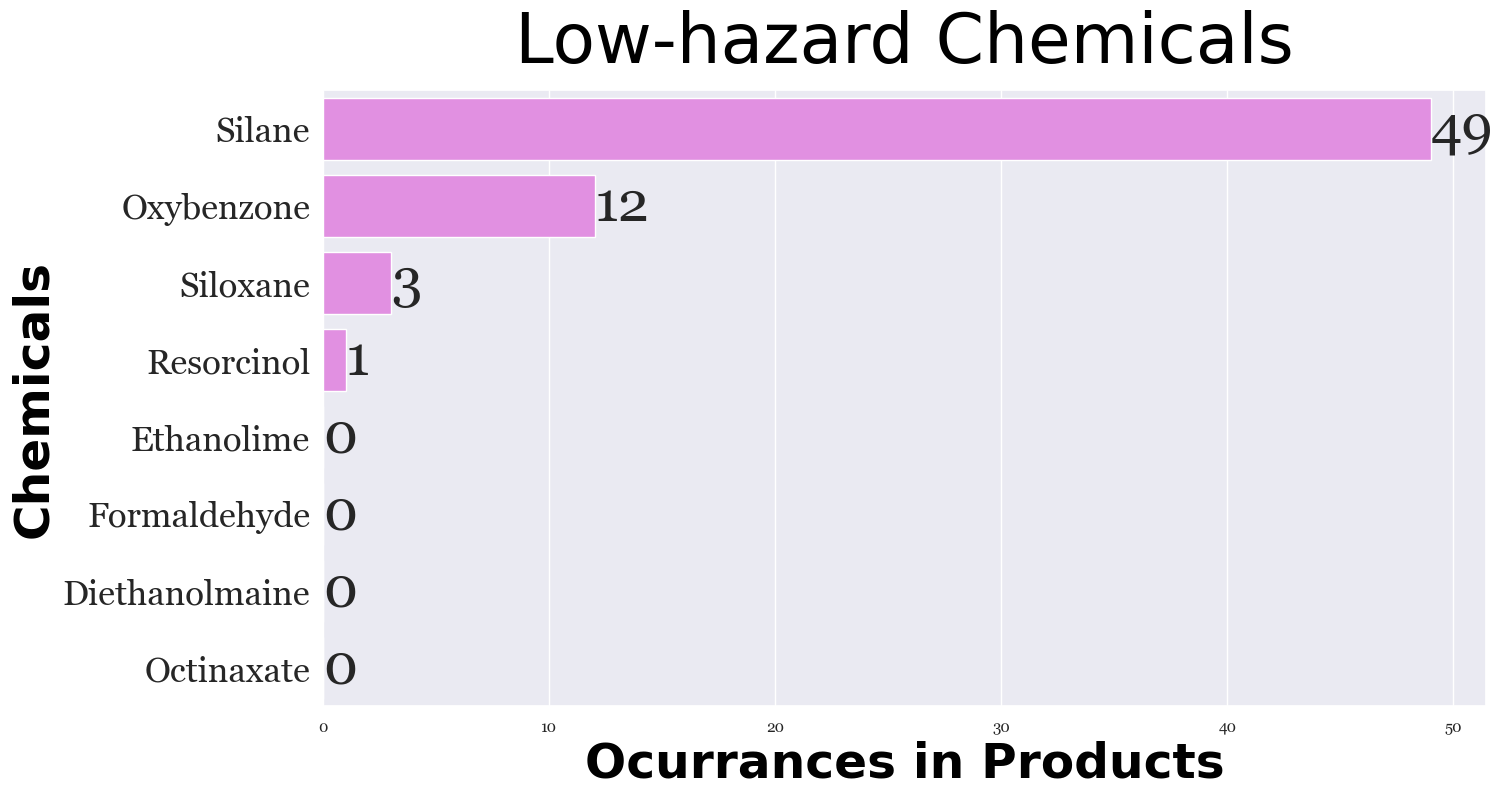

In [17]:
ethanolamine_occ = df[df['Ingredients'].str.contains('Ethanolamine')].shape[0]
oxybenzone_occ = df[df['Ingredients'].str.contains("Oxybenzone")].shape[0]
resorcinol_occ = df[df['Ingredients'].str.contains("Resorcinol")].shape[0]
formaldehyde_occ = df[df['Ingredients'].str.contains("Formaldehyde")].shape[0]
diethanolamine_occ = df[df['Ingredients'].str.contains("Diethanol")].shape[0]
silanes_occ = df[df['Ingredients'].str.contains("Silane")].shape[0]
siloxanes_occ = df[df['Ingredients'].str.contains("Siloxane")].shape[0]
octinaxate_occ = df[df['Ingredients'].str.contains("Octinaxate")].shape[0]

sns.set(font_scale=2)
sns.set(font="Georgia")

title_font = {
    'family': 'Baskerville Old Face',
    'color': 'black',
    'weight': '400',
    'size': 50
    
}
label_font = {
    'family': 'Franklin Gothic Medium',
    'color': 'black',
    'weight': 'bold',
    'size': 35
}

opt_font = {
    'family': 'Franklin Gothic Medium',
    'color': 'black',
    'weight': '100',
    'size': 12
}

occurances = [silanes_occ, oxybenzone_occ, siloxanes_occ, resorcinol_occ, ethanolamine_occ, formaldehyde_occ, diethanolamine_occ, octinaxate_occ]
chemicals = ['Silane', 'Oxybenzone', 'Siloxane', 'Resorcinol', 'Ethanolime', 'Formaldehyde', 'Diethanolmaine', 'Octinaxate']
ax = sns.barplot(x=occurances, y=chemicals,  color = 'violet')

ax.set_title('Low-hazard Chemicals', fontdict=title_font, pad=20)

ax.bar_label(ax.containers[0], size = 40) # shows the number of exact occurances on each bar

sns.set(rc={'figure.figsize':(15,8)})
ax.set_xlabel("Ocurrances in Products", fontdict= label_font)
# ax.set_xticklabels(ax.get_xticklabels(), size =20)

ax.set_ylabel("Chemicals", fontdict= label_font)
ax.set_yticklabels(ax.get_yticklabels(), size=25)
#plt.text(50, 1, 'allergens, harmful to the environment, cause irritation', fontdict = opt_font)


## Plotting the moderate-hazard chemcials

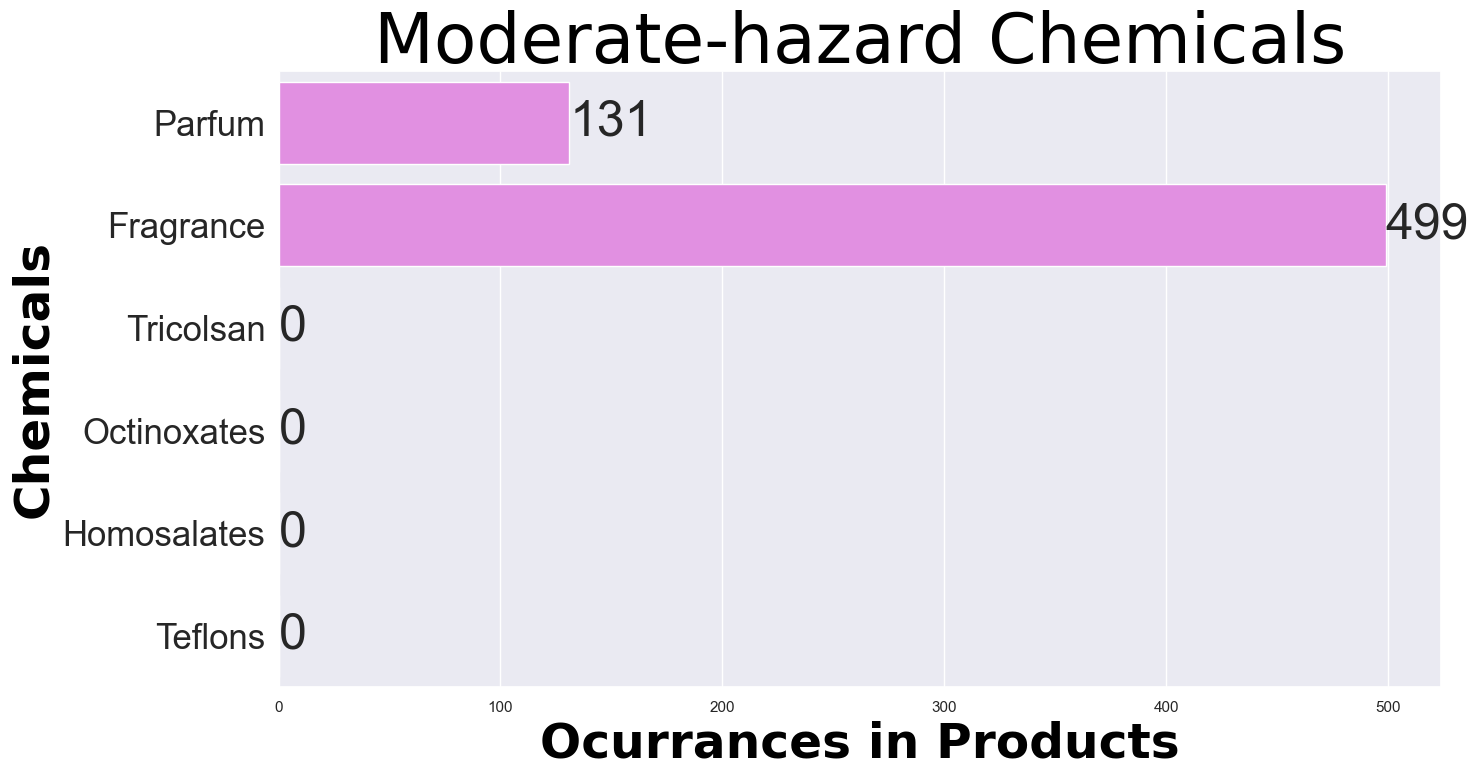

In [18]:
parfum_occ = df[df['Ingredients'].str.contains("Parfum")].shape[0]
fragrance_occ = df[df['Ingredients'].str.contains("Fragrance")].shape[0]
triclosan_occ = df[df['Ingredients'].str.contains("triclosan")].shape[0]
octinoxates_occ = df[df['Ingredients'].str.contains("Octinaxate")].shape[0]
homosalate_occ = df[df['Ingredients'].str.contains("homosalate")].shape[0]
teflon_occ = df[df['Ingredients'].str.contains("teflon")].shape[0]


occurances = [parfum_occ, fragrance_occ, triclosan_occ, octinoxates_occ, homosalate_occ, teflon_occ]
chemicals = ['Parfum', 'Fragrance', 'Tricolsan', 'Octinoxates', 'Homosalates', 'Teflons']
ax = sns.barplot(x=occurances, y=chemicals,  color = 'violet')

sns.set(font_scale=2)
sns.set(font="Georgia")

title_font = {
    'family': 'Baskerville Old Face',
    'color': 'black',
    'weight': '400',
    'size': 50
    
}
label_font = {
    'family': 'Franklin Gothic Medium',
    'color': 'black',
    'weight': 'bold',
    'size': 35
}

opt_font = {
    'family': 'Franklin Gothic Medium',
    'color': 'black',
    'weight': '100',
    'size': 12
}

sns.set(font_scale = 3)
sns.color_palette("hls", 8)

ax.bar_label(ax.containers[0])

#sns.set_style("whitegrid")
#plt.set(rc={'axes.facecolor': lightblue, 'figures.facecolor': lightblue})

sns.set(rc={'figure.figsize':(15,8)})
ax.set_xlabel("Ocurrances in Products", fontdict= label_font)

ax.set_ylabel("Chemicals", fontdict= label_font)
ax.set_yticklabels(ax.get_yticklabels(), size=25)
# plt.text(-5, 1, 'endocrine disruptors, estrogen mimickers', fontdict = opt_font)

#ax.set(xlabel="Ocurrances in Products", ylabel= "Chemcials")

ax.set_title('Moderate-hazard Chemicals', fontdict=title_font)

plt.savefig("../reports/figures/moderate_hazard_chemicals.png") 

## Plotting the high-hazard chemcials

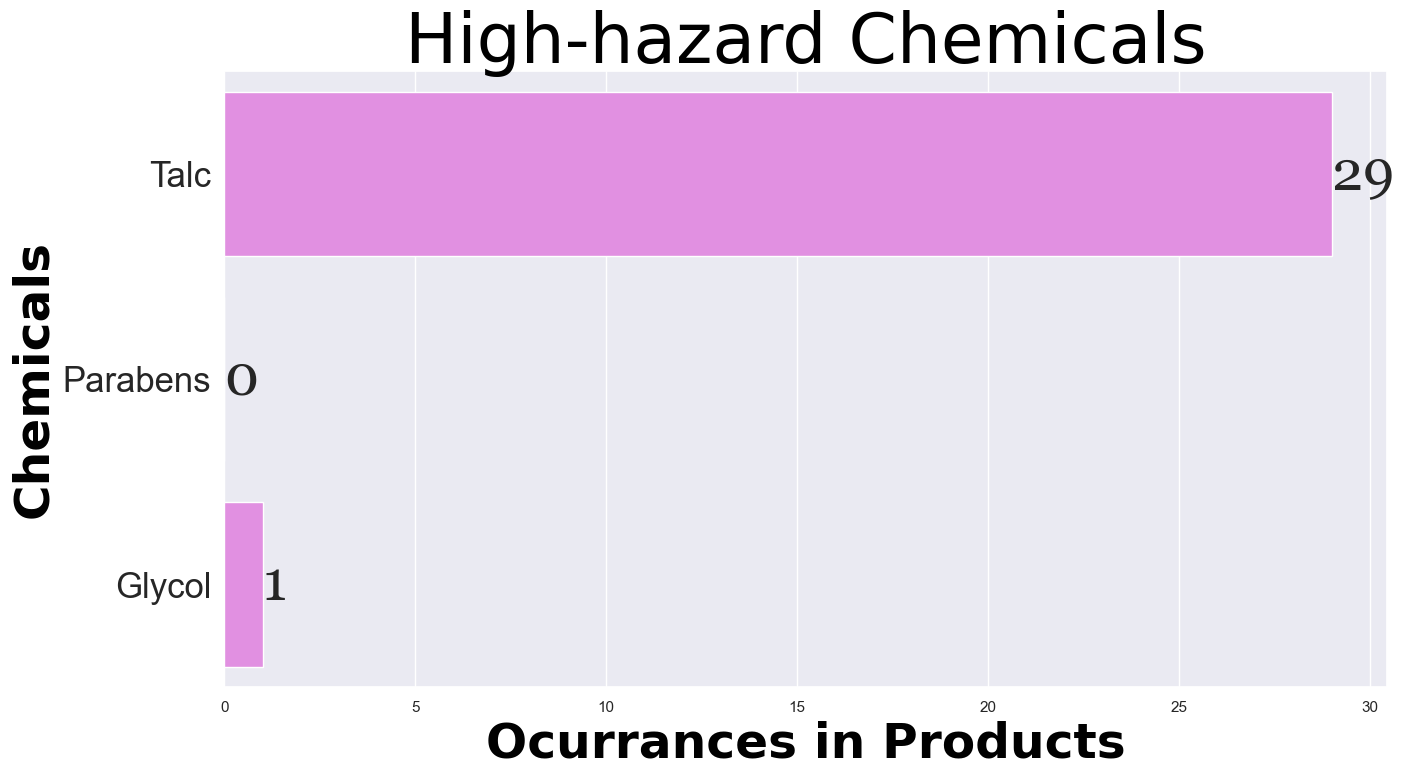

In [19]:
talc_occ = df[df['Ingredients'].str.contains("Talc")].shape[0]
parabens_occ = df[df['Ingredients'].str.contains("Parabens")].shape[0]
glycol_occ = df[df['Ingredients'].str.contains("Polyethylene Glycol")].shape[0]

occurances = [talc_occ, parabens_occ, glycol_occ]
chemicals = ['Talc', 'Parabens', 'Glycol']
ax = sns.barplot(x= occurances, y= chemicals, color="violet")
ax.set_title('High-hazard Chemicals', fontdict=title_font)


# sns.set(font_scale=2)
sns.set(font="Georgia")

title_font = {
    'family': 'Baskerville Old Face',
    'color': 'black',
    'weight': '400',
    'size': 50
    
}
label_font = {
    'family': 'Franklin Gothic Medium',
    'color': 'black',
    'weight': 'bold',
    'size': 35
}

opt_font = {
    'family': 'Franklin Gothic Medium',
    'color': 'black',
    'weight': '100',
    'size': 12
}


ax.bar_label(ax.containers[0], size=40)

sns.set(rc={'figure.figsize':(15,8)})
ax.set_xlabel("Ocurrances in Products", fontdict= label_font)

ax.set_ylabel("Chemicals", fontdict= label_font)
ax.set_yticklabels(ax.get_yticklabels(), size=25)
#plt.text(5, 1, 'carcinogens & mutagens', fontdict = opt_font)

#save the plot as a file
plt.savefig("../reports/figures/high_hazard_chemicals.png") 

/var/folders/mw/fc5wj4ns76x4xcwycqk0_bt00000gn/T/ipykernel_45247/1202970592.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), size = 12)
findfont: Font family ['Baskerville Old Face'] not found. Falling back to DejaVu Sans.


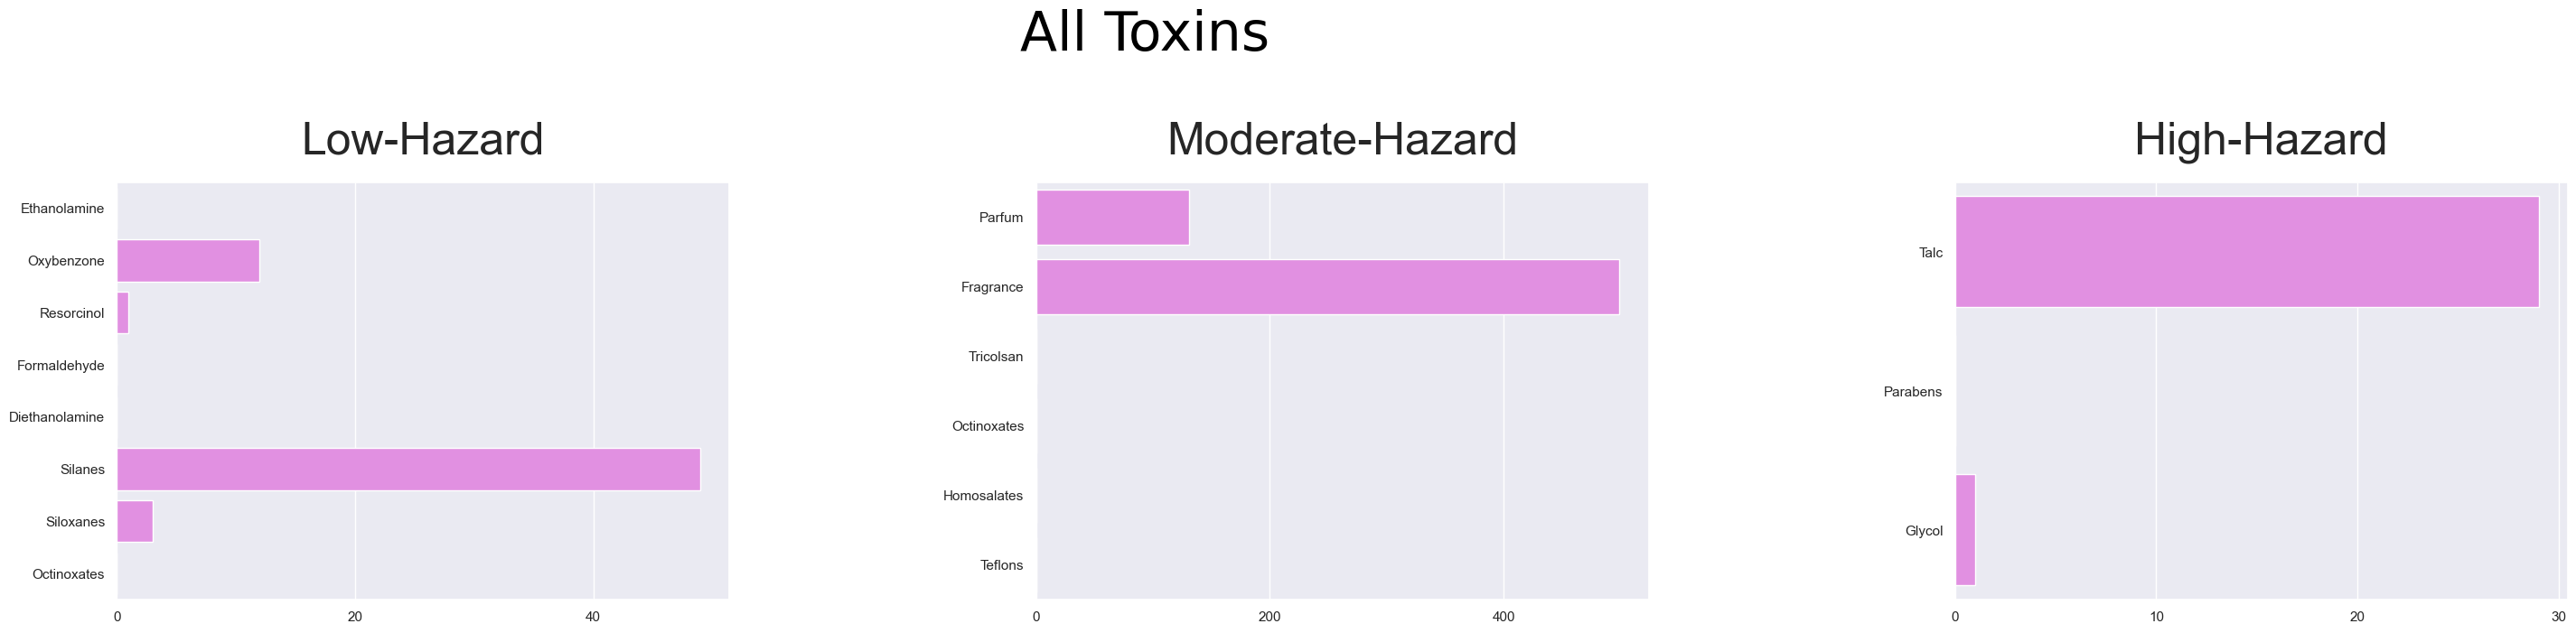

<Figure size 10000x1000 with 0 Axes>

<Figure size 10000x1000 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

In [20]:
#low hazard
ethanolamine_occ = df[df['Ingredients'].str.contains('Ethanolamine')].shape[0]
oxybenzone_occ = df[df['Ingredients'].str.contains("Oxybenzone")].shape[0]
resorcinol_occ = df[df['Ingredients'].str.contains("Resorcinol")].shape[0]
formaldehyde_occ = df[df['Ingredients'].str.contains("Formaldehyde")].shape[0]
diethanolamine_occ = df[df['Ingredients'].str.contains("Diethanol")].shape[0]
silanes_occ = df[df['Ingredients'].str.contains("Silane")].shape[0]
siloxanes_occ = df[df['Ingredients'].str.contains("Siloxane")].shape[0]
octinaxate_occ = df[df['Ingredients'].str.contains("Octinaxate")].shape[0]

occurances = [ethanolamine_occ, oxybenzone_occ, resorcinol_occ, formaldehyde_occ, diethanolamine_occ, silanes_occ, siloxanes_occ, octinaxate_occ]
chemicals = ['Ethanolamine', 'Oxybenzone', 'Resorcinol', 'Formaldehyde', 'Diethanolamine', 'Silanes', 'Siloxanes', 'Octinoxates']

#moderate hazard
parfum_occ = df[df['Ingredients'].str.contains("Parfum")].shape[0]
fragrance_occ = df[df['Ingredients'].str.contains("Fragrance")].shape[0]
triclosan_occ = df[df['Ingredients'].str.contains("triclosan")].shape[0]
octinoxates_occ = df[df['Ingredients'].str.contains("Octinaxate")].shape[0]
homosalate_occ = df[df['Ingredients'].str.contains("homosalate")].shape[0]
teflon_occ = df[df['Ingredients'].str.contains("teflon")].shape[0]


occurances1 = [parfum_occ, fragrance_occ, triclosan_occ, octinoxates_occ, homosalate_occ, teflon_occ]
chemicals1 = ['Parfum', 'Fragrance', 'Tricolsan', 'Octinoxates', 'Homosalates', 'Teflons']

#high hazard
talc_occ = df[df['Ingredients'].str.contains("Talc")].shape[0]
parabens_occ = df[df['Ingredients'].str.contains("Parabens")].shape[0]
glycol_occ = df[df['Ingredients'].str.contains("Polyethylene Glycol")].shape[0]

occurances2 = [talc_occ, parabens_occ, glycol_occ]
chemicals2 = ['Talc', 'Parabens', 'Glycol']

#total_chem = chemicals + chemicals1 + chemicals2 for swarmplot

fig,axs = plt.subplots(ncols = 3, figsize=(35,6))
sns.barplot(x=occurances, y=chemicals,  color = 'violet', ax=axs[0])
sns.barplot(x=occurances1, y=chemicals1,  color = 'violet', ax=axs[1])
sns.barplot(x=occurances2, y=chemicals2,  color = 'violet', ax=axs[2])

sns.set(font_scale=2)
sns.set(font="Georgia")

title_font = {
    'family': 'Baskerville Old Face',
    'color': 'black',
    'weight': '400',
    'size': 50
    
}
label_font = {
    'family': 'Franklin Gothic Medium',
    'color': 'black',
    'weight': 'bold',
    'size': 20
}

opt_font = {
    'family': 'Franklin Gothic Medium',
    'color': 'black',
    'weight': '100',
    'size': 12
}

sns.set(font_scale = 3)
sns.color_palette("hls", 8)

plt.figure(figsize=(100,10))

plt.figure(figsize=(100,10))

ax.set_xlabel("Occurances", fontdict= label_font)
ax.set_xticklabels(ax.get_xticklabels(), size = 12)

ax.set_ylabel("Toxin", fontdict= label_font)
ax.set_yticklabels(ax.get_yticklabels(), size=12)

fig.suptitle('All Toxins', fontdict= title_font, y=1.2, x=.45)

fig.subplots_adjust(hspace=5, wspace=0.5)

axs[0].set_title('Low-Hazard', y=1.05)
axs[1].set_title('Moderate-Hazard', y=1.05)
axs[2].set_title('High-Hazard', y=1.05)

plt.show()

plt.savefig("../reports/figures/all_toxins.png") 

---

## Price vs. Cost - Linear Regression Model

findfont: Font family ['Franklin Gothic Medium'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Baskerville Old Face'] not found. Falling back to DejaVu Sans.


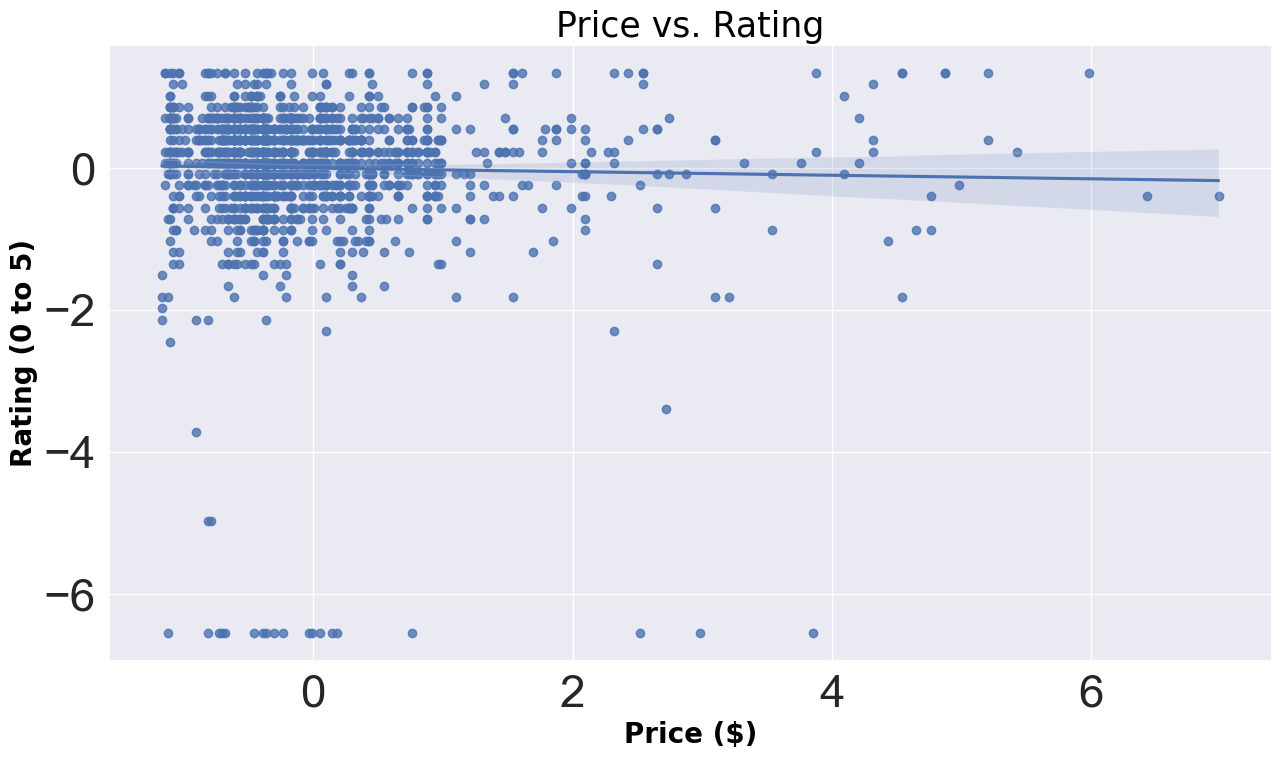

<Figure size 4000x1000 with 0 Axes>

<Figure size 4000x1000 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

In [21]:
from sklearn.linear_model import LinearRegression
# df = pd.read_csv('')
#print(df.iloc[:,3].to_string())

#print(df.iloc[:,4].to_string())

price_list=df['Price'].tolist()
rating_list=df['Rank'].tolist()


#print(price_list)
print("\n")
#print(rating_list)

ax = sns.regplot(
    x=price_list,
    y=rating_list,
    
)

sns.set(font_scale=2)
sns.set(font="Georgia")

title_font = {
    'family': 'Baskerville Old Face',
    'color': 'black',
    'weight': '400',
    'size': 25
    
}
label_font = {
    'family': 'Franklin Gothic Medium',
    'color': 'black',
    'weight': 'bold',
    'size': 20
}

opt_font = {
    'family': 'Franklin Gothic Medium',
    'color': 'black',
    'weight': '100',
    'size': 12
}

sns.set(font_scale = 3)
plt.figure(figsize=(40,10))
sns.color_palette("hls", 8)

plt.figure(figsize=(40,10))
ax.set_xlabel("Price ($)", fontdict= label_font)
# ax.set_xticklabels(ax.get_xticklabels(), size = 12)

ax.set_ylabel("Rating (0 to 5)", fontdict= label_font)
# ax.set_yticklabels(ax.get_yticklabels(), size=12)
#plt.text(5, 1, 'carcinogens & mutagens', fontdict = opt_font)

#ax.set(xlabel="Ocurrances in Products", ylabel= "Chemcials")

ax.set_title('Price vs. Rating', fontdict=title_font)

plt.show()
plt.savefig("../reports/figures/price_vs_rating.png") 

/var/folders/mw/fc5wj4ns76x4xcwycqk0_bt00000gn/T/ipykernel_45247/1840372239.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), size = 12)
/var/folders/mw/fc5wj4ns76x4xcwycqk0_bt00000gn/T/ipykernel_45247/1840372239.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), size=12)


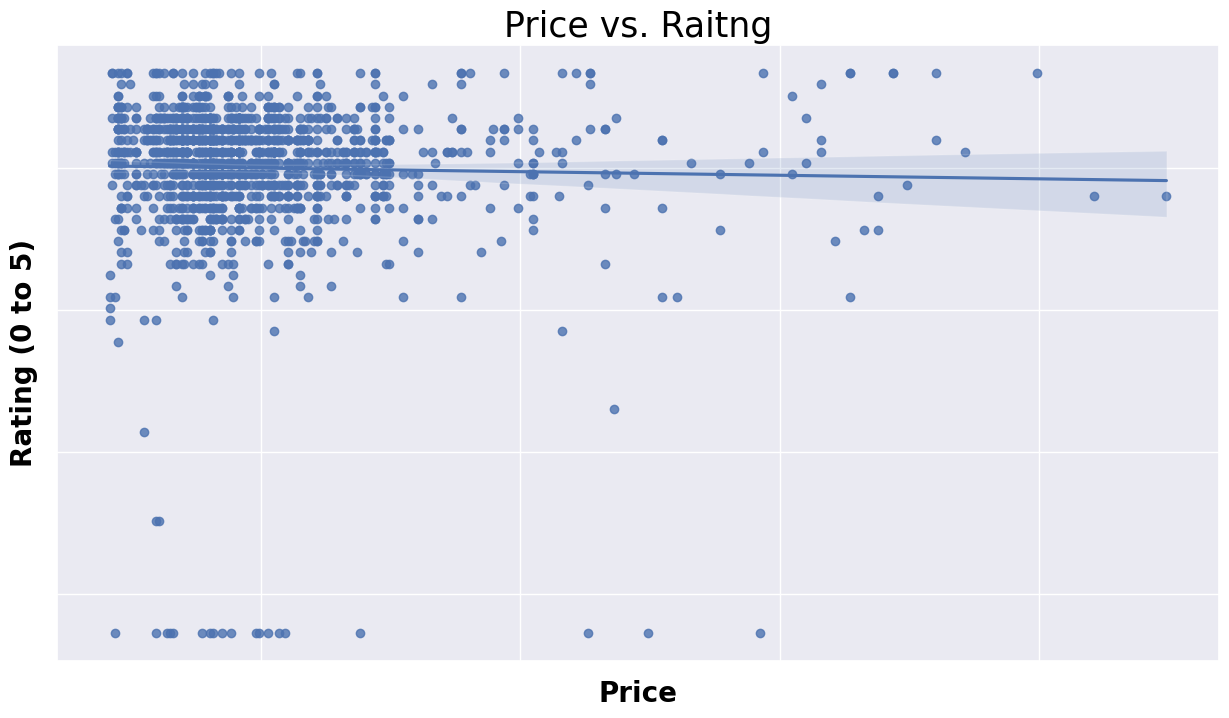

<Figure size 10000x1000 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

In [22]:
ax = sns.regplot(
    x="Price", 
    y="Rank", 
    data = df, 
    dropna=False)


x_data = ax.get_lines()[0].get_xdata()
y_data = ax.get_lines()[0].get_ydata()

#p.get_children()[1].get_paths()

#finding the slope at different points in the graph
#print(x_data)
#print(y_data)

sns.set(font_scale=2)
sns.set(font="Georgia")

title_font = {
    'family': 'Baskerville Old Face',
    'color': 'black',
    'weight': '400',
    'size': 25
    
}
label_font = {
    'family': 'Franklin Gothic Medium',
    'color': 'black',
    'weight': 'bold',
    'size': 20
}

opt_font = {
    'family': 'Franklin Gothic Medium',
    'color': 'black',
    'weight': '100',
    'size': 12
}

sns.set(font_scale = 3)
sns.color_palette("hls", 8)

plt.figure(figsize=(100,10))
ax.set_xlabel("Price", fontdict= label_font)
ax.set_xticklabels(ax.get_xticklabels(), size = 12)

ax.set_ylabel("Rating (0 to 5)", fontdict= label_font)
ax.set_yticklabels(ax.get_yticklabels(), size=12)

ax.set_title('Price vs. Raitng', fontdict=title_font)

plt.show()
plt.savefig("../reports/figures/price_vs_rating_scatterplot.png") 

## Brand vs. Rank

/var/folders/mw/fc5wj4ns76x4xcwycqk0_bt00000gn/T/ipykernel_45247/734112890.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), size=12)


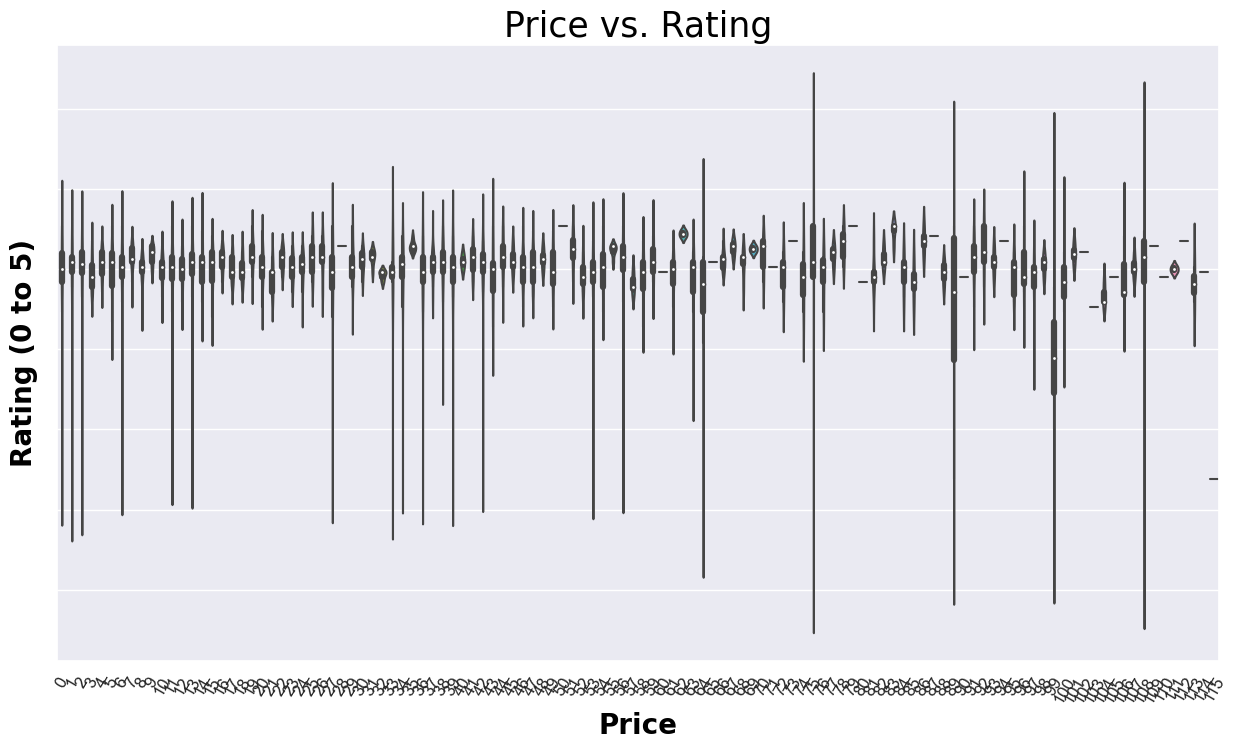

<Figure size 4000x827 with 0 Axes>

In [23]:

brand_list=df['Brand'].tolist()
rating_list=df['Rank'].tolist()

ax = sns.violinplot(
    x='Brand',
    y='Rank',
    data = df
)

title_font = {
    'family': 'Baskerville Old Face',
    'color': 'black',
    'weight': '400',
    'size': 25
    
}
label_font = {
    'family': 'Franklin Gothic Medium',
    'color': 'black',
    'weight': 'bold',
    'size': 20
}

opt_font = {
    'family': 'Franklin Gothic Medium',
    'color': 'black',
    'weight': '100',
    'size': 12
}

sns.set(font_scale = 3)
sns.color_palette("hls", 8)

#plt.figure(figsize=(400,10))
sns.set(rc={'figure.figsize':(40,8.27)})
ax.set_xlabel("Price", fontdict = label_font)
ax.set_xticklabels(ax.get_xticklabels(), size = 12, rotation = 60)

ax.set_ylabel("Rating (0 to 5)", fontdict = label_font)
ax.set_yticklabels(ax.get_yticklabels(), size=12)
#plt.text(5, 1, 'carcinogens & mutagens', fontdict = opt_font)

#ax.set(xlabel="Ocurrances in Products", ylabel= "Chemcials")

ax.set_title('Price vs. Rating', fontdict=title_font)

plt.show()

plt.savefig("../reports/figures/price_vs_rating_violinplot.png") 